In [1]:
import pandas as pd
import numpy as np

data = {
"Overhead":[142383,168334,163118,160648,157173,164303,162857,168552,149727,155692,
157507,163785,152156,169941,159823,161205,172019,157697,151165,167519,155396,154229,
173696,154917,155863,159214,177199,165296,176746,153627,171074,162444,162584,168988,
161042,168706],
"MH":[859,1071,1003,1039,893,1092,1173,986,851,927,994,1094,940,1059,1058,1084,1112,
944,839,1036,959,1001,1141,999,962,1002,1137,1156,1181,845,1028,875,1010,978,1037,
1033],
"DMC":[64888,71144,69316,70394,64562,69162,75125,71178,69930,69112,70980,70813,
68443,77222,70572,68328,74157,68552,61990,66065,67356,67498,76043,68788,70969,
67566,80376,75514,79242,70477,70689,68053,72954,71914,74836,74390]
}
df = pd.DataFrame(data)
corr = df.corr().round(3)
corr


,Overhead,MH,DMC
Overhead,1.000,0.751,0.726
MH,0.751,1.000,0.717
DMC,0.726,0.717,1.000


In [2]:
# SSE mean model
y = df["Overhead"]
ymean = y.mean()
sse_null = ((y - ymean)**2).sum().round()
sse_null


2188779042.0

In [3]:
import statsmodels.api as sm

# 1 OH ~ MH
X1 = sm.add_constant(df["MH"])
m1 = sm.OLS(y,X1).fit()
sse1 = sum(m1.resid**2)

# 2 OH ~ DMC
X2 = sm.add_constant(df["DMC"])
m2 = sm.OLS(y,X2).fit()
sse2 = sum(m2.resid**2)

# 3 OH ~ MH + DMC
X3 = sm.add_constant(df[["MH","DMC"]])
m3 = sm.OLS(y,X3).fit()
sse3 = sum(m3.resid**2)

ratio1 = sse1/sse_null
ratio2 = sse2/sse_null
ratio3 = sse3/sse_null

(m1.rsquared, m2.rsquared, m3.rsquared, ratio1, ratio2, ratio3)


(0.5646894085015981,
 0.5274818375406599,
 0.6369480938778402,
 0.4353105914265831,
 0.47251816238138267,
 0.36305190606226245)

In [4]:
# correlation between observed and predicted for model 3
pred3 = m3.fittedvalues
corr_pred = np.corrcoef(y, pred3)[0,1]
corr_pred


0.798090279277877

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Data
data = {
    "Unit": list(range(1, 51)),
    "Labor_Hours": [28,18,14,13,10,11,13,11,12,8,13,8,9,9,7,11,9,8,8,8,
                    9,4,6,5,7,5,10,4,6,8,6,7,2,8,6,5,5,6,4,5,6,6,6,2,7,7,5,6,7,4]
}

df = pd.DataFrame(data)

# Log transformation
df['Log_Unit'] = np.log10(df['Unit'])
df['Log_Labor'] = np.log10(df['Labor_Hours'])

# Regression: Log(Labor Hours) ~ Log(Unit)
X = sm.add_constant(df['Log_Unit'])
y = df['Log_Labor']
model = sm.OLS(y, X).fit()

# Regression equation
intercept = model.params['const']
slope = model.params['Log_Unit']
print(f"Predicted Log(Labor Hours) = {intercept:.4f} + {slope:.4f} * Log(Unit)")

# Predict Labor Hours for units 51-100
future_units = np.arange(51, 101)
log_future_units = np.log10(future_units)
log_pred_hours = intercept + slope * log_future_units
pred_hours = 10 ** log_pred_hours  # convert back from log
total_pred_hours = pred_hours.sum()

print(f"Total predicted labor hours for units 51-100: {round(total_pred_hours)}")


Predicted Log(Labor Hours) = 1.4026 + -0.4237 * Log(Unit)
Total predicted labor hours for units 51-100: 205


C:\Users\HomePC\AppData\Local\Temp\ipykernel_20412\1184163594.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HomePC\AppData\Local\Temp\ipykernel_20412\1184163594.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


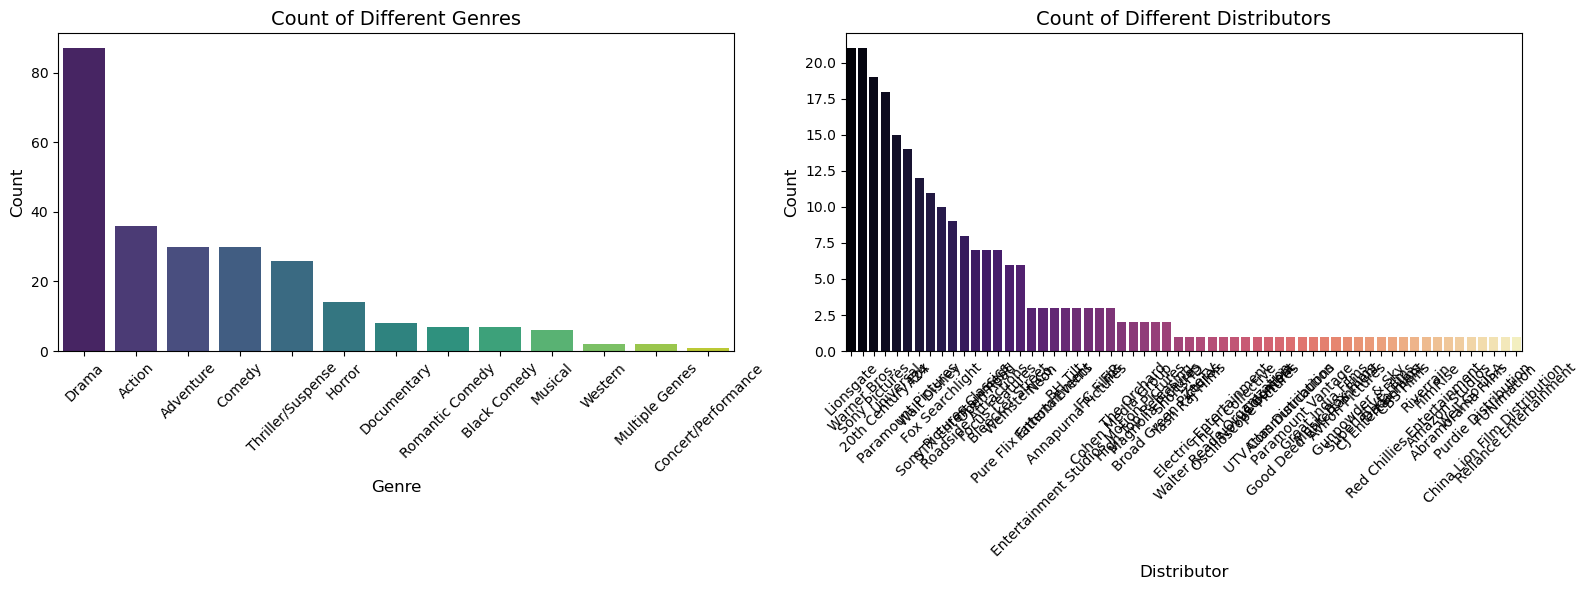

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data from the specified Excel file
# The 'Data' sheet is assumed for a typical Excel file structure.
# The user specified 'P02_02.xlsx' in the prompt, so this name is used.
try:
    df = pd.read_excel('P02_02.xlsx', sheet_name='Data')
except FileNotFoundError:
    print("Error: The file 'P02_02.xlsx' was not uploaded or could not be found.")
    # Exits the script if the file is missing
    exit()

# 2. Prepare the figure and axes for two side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.style.use('ggplot') # Optional: Use a clear plotting style

# --- Chart 1: Count of Different Genres ---
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

sns.barplot(
    x=genre_counts.index,
    y=genre_counts.values,
    ax=axes[0],
    palette='viridis' # A distinct color palette
)

axes[0].set_title('Count of Different Genres', fontsize=14)
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
# Rotate x-labels for better readability, especially with many genres
axes[0].tick_params(axis='x', rotation=45)

# --- Chart 2: Count of Different Distributors ---
# This is the appropriate chart (bar chart) for counting categorical data
distributor_counts = df['Distributor'].value_counts().sort_values(ascending=False)

sns.barplot(
    x=distributor_counts.index,
    y=distributor_counts.values,
    ax=axes[1],
    palette='magma' # A different distinct color palette
)

axes[1].set_title('Count of Different Distributors', fontsize=14)
axes[1].set_xlabel('Distributor', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
# Rotate x-labels for better readability
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Save the combined chart
plt.savefig('genre_distributor_counts.png')
# plt.show() # Uncomment this line if running in a local environment

In [12]:
df = pd.read_excel('P02_02.xlsx', sheet_name='Data')

In [13]:
df.head()

,Rank,Movie,Release Date,Distributor,Genre,MPAA,2017 Gross,Tickets Sold
0,1,Star Wars Ep. VIII: The Last Jedi,12/15/2017,Walt Disney,Adventure,PG-13,517218368,57660910
1,2,Beauty and the Beast,3/17/2017,Walt Disney,Musical,PG,504014165,56188870
2,3,Wonder Woman,6/2/2017,Warner Bros.,Action,PG-13,412563408,45993691
3,4,Guardians of the Galaxy Vol 2,5/5/2017,Walt Disney,Action,PG-13,389813101,43457424
4,5,Spider-Man: Homecoming,7/7/2017,Sony Pictures,Action,PG-13,334201140,37257652


C:\Users\HomePC\AppData\Local\Temp\ipykernel_20412\574294552.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_distributor.index, y=pivot_distributor['Count'], ax=ax2, palette='viridis')


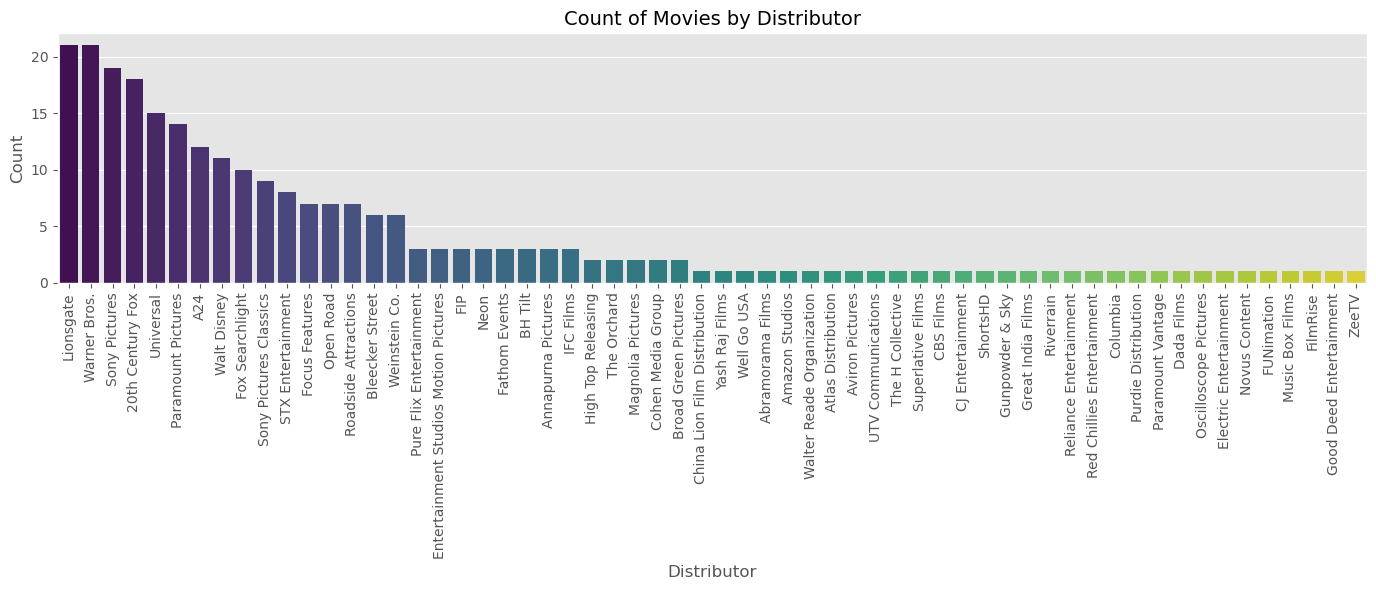

In [16]:
# Pivot table: count of movies by Distributor
pivot_distributor = df.pivot_table(index='Distributor', values='Movie', aggfunc='count')\
                       .rename(columns={'Movie': 'Count'})\
                       .sort_values('Count', ascending=False)

# Display the pivot table
pivot_distributor

# Pivot chart: barplot of counts (all distributors)
fig2, ax2 = plt.subplots(figsize=(14, 6))
sns.barplot(x=pivot_distributor.index, y=pivot_distributor['Count'], ax=ax2, palette='viridis')
ax2.set_title('Count of Movies by Distributor', fontsize=14)
ax2.set_xlabel('Distributor', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.savefig('pivot_distributor_counts.png')
plt.show()

In [17]:
pivot_distributor

,Count
Distributor,
Lionsgate,21
Warner Bros.,21
Sony Pictures,19
20th Century Fox,18
Universal,15
Paramount Pictures,14
A24,12
Walt Disney,11
Fox Searchlight,10


In [15]:
pivot_table_counts

Distributor,20th Century Fox,A24,Abramorama Films,Amazon Studios,Annapurna Pictures,Atlas Distribution,Aviron Pictures,BH Tilt,Bleecker Street,Broad Green Pictures,...,UTV Communications,Universal,Walt Disney,Walter Reade Organization,Warner Bros.,Weinstein Co.,Well Go USA,Yash Raj Films,ZeeTV,Total
Genre,,,,,,,,,,,,,,,,,,,,,
Action,4,1,0,0,0,0,0,1,1,0,...,1,2,2,0,5,0,0,1,1,36
Adventure,5,0,0,0,0,0,0,0,1,0,...,0,3,5,0,5,1,0,0,0,30
Black Comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
Comedy,2,1,0,0,1,0,0,0,2,1,...,0,2,0,0,4,0,0,0,0,30
Concert/Performance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Documentary,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8
Drama,3,7,0,1,2,1,0,1,2,0,...,0,3,0,0,3,4,1,0,0,87
Horror,1,2,0,0,0,0,0,1,0,1,...,0,2,0,1,2,0,0,0,0,14
Multiple Genres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [31]:
df = pd.read_excel("P02_31.xlsx")
df.head()

,Date,Index,PCT change
0,2015-01-02,2058.20,NaN
1,2015-01-05,2020.58,-0.018278
2,2015-01-06,2002.61,-0.008893
3,2015-01-07,2025.90,0.011630
4,2015-01-08,2062.14,0.017888


In [32]:
import pandas as pd

# Load data
df = pd.read_excel("P02_31.xlsx")

# # Ensure % change is numeric
# df['% change'] = df['% change'].str.rstrip('%').astype(float)

# Type 1: ±3 standard deviations
mean = df['PCT change'].mean()
std = df['PCT change'].std()
type1_outliers = df[(df['PCT change'] < mean - 3*std) | (df['PCT change'] > mean + 3*std)]

# Type 2: 1.5 IQR
Q1 = df['PCT change'].quantile(0.25)
Q3 = df['PCT change'].quantile(0.75)
IQR = Q3 - Q1
type2_outliers = df[(df['PCT change'] < Q1 - 1.5*IQR) | (df['PCT change'] > Q3 + 1.5*IQR)]

# Type 2 extreme: 3.0 IQR
type2_extreme_outliers = df[(df['PCT change'] < Q1 - 3*IQR) | (df['PCT change'] > Q3 + 3*IQR)]

# Counts
print("Type 1 outliers:", len(type1_outliers))
print("Type 2 outliers:", len(type2_outliers))
print("Type 2 extreme outliers:", len(type2_extreme_outliers))


Type 1 outliers: 12
Type 2 outliers: 69
Type 2 extreme outliers: 11


In [33]:
import pandas as pd

# Load data
df = pd.read_excel("P02_32.xlsx")

variables = ['Age', 'Income', 'Alcohol', 'Exercise', 'Smoke']

# DataFrames to store results
mean_filled = {}
mean_missing = {}

for var in variables:
    # Mean BP for rows without missing values
    mean_filled[var] = round(df.loc[df[var].notna(), 'Blood Pressure'].mean(), 2)
    
    # Mean BP for rows with missing values
    mean_missing[var] = round(df.loc[df[var].isna(), 'Blood Pressure'].mean(), 2)

# Convert results to DataFrame for clarity
df_filled = pd.DataFrame(mean_filled, index=['Mean'])
df_missing = pd.DataFrame(mean_missing, index=['Mean'])

print("Data Filled In (non-missing values):")
print(df_filled)
print("\nMissing Data:")
print(df_missing)


Data Filled In (non-missing values):
        Age  Income  Alcohol  Exercise  Smoke
Mean  46.41   46.44    46.12     45.83  45.36

Missing Data:
        Age  Income  Alcohol  Exercise  Smoke
Mean  44.78   40.03    47.79     53.04  54.31


In [37]:
import pandas as pd

# Load data
df = pd.read_excel("CatalogMarketing.xlsx")
df.head()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Region,State,City,First Purchase,Amount Spent
0,1,1,0,0,0,1,16400,1,1.0,12,South,Florida,Orlando,2011-10-23,217.691
1,2,2,0,1,1,0,108100,3,3.0,18,Midwest,Illinois,Chicago,2009-05-25,2632.462
2,3,2,1,1,1,1,97300,1,NaN,12,South,Florida,Orlando,2015-08-18,3047.563
3,4,3,1,1,1,1,26800,0,1.0,12,East,Ohio,Cleveland,2012-12-26,434.606
4,5,1,1,0,0,1,11200,0,NaN,6,Midwest,Illinois,Chicago,2015-08-04,105.624


In [ ]:
import pandas as pd

file_name = 'CatalogMarketing.xlsx'

try:
    # Load the data
    df = pd.read_excel(file_name)
    
    # Check for null values across the entire DataFrame
    null_counts = df.isnull().sum()
    
    print("--- Null Value Counts Per Column ---")
    # This shows the columns that contain null values and their count
    print(null_counts[null_counts > 0])
    
    # Also print the total number of rows with at least one null value
    total_null_rows = df.isnull().any(axis=1).sum()
    print(f"\nTotal rows with at least one null value: {total_null_rows}")

except FileNotFoundError:
    
    print(f"Error: The file '{file_name}' was not found. Please ensure it is in the correct directory.")

--- Null Value Counts Per Column ---
History    303
dtype: int64

Total rows with at least one null value: 303


Crosstab (Percentages by Gender):
Gender             Female  Male
Opinion                        
Agree                20.9  20.0
Disagree             21.8  20.6
Neutral              16.7  17.6
Strongly agree       19.7  24.2
Strongly disagree    20.9  17.6


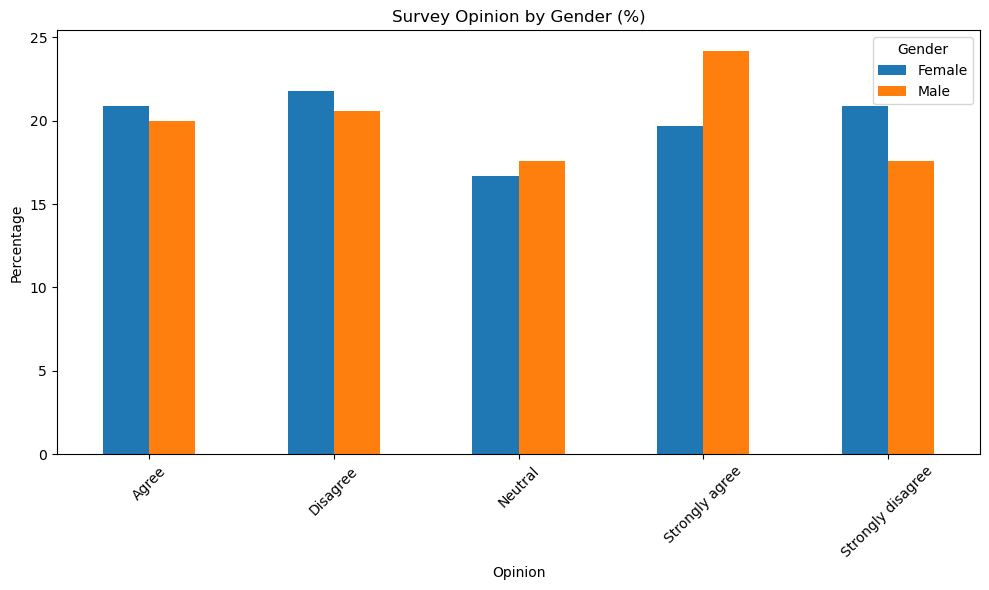

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("P03_02.xlsx")

# Ensure Gender is numeric or consistent
# Assuming Gender: 1=Male, 2=Female
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Female'})

# Crosstab with counts
ct = pd.crosstab(df['Opinion'], df['Gender'])

# Convert counts to percentages by column (gender)
ct_percent = ct.div(ct.sum(axis=0), axis=1) * 100
ct_percent = ct_percent.round(1)

print("Crosstab (Percentages by Gender):")
print(ct_percent)

# Plot column chart
ct_percent.plot(kind='bar', figsize=(10,6))
plt.title('Survey Opinion by Gender (%)')
plt.ylabel('Percentage')
plt.xlabel('Opinion')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Crosstab (Percentages by Age):
Age                Elderly  Middle-aged  Young
Opinion                                       
Agree                 19.1         22.0   18.4
Disagree              22.3         20.6   21.8
Neutral               16.0         17.4   17.2
Strongly agree        21.3         22.0   20.7
Strongly disagree     21.3         17.9   21.8


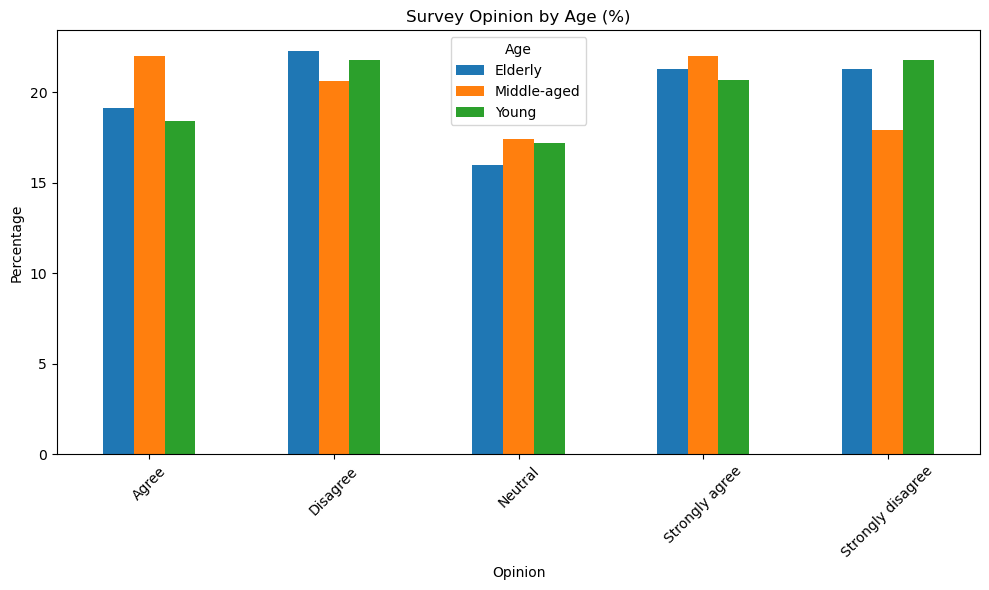

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("P03_02.xlsx")

# Crosstab with counts
ct_age = pd.crosstab(df['Opinion'], df['Age'])

# Convert counts to percentages by column (age)
ct_age_percent = ct_age.div(ct_age.sum(axis=0), axis=1) * 100
ct_age_percent = ct_age_percent.round(1)

print("Crosstab (Percentages by Age):")
print(ct_age_percent)

# Plot column chart
ct_age_percent.plot(kind='bar', figsize=(10,6))
plt.title('Survey Opinion by Age (%)')
plt.ylabel('Percentage')
plt.xlabel('Opinion')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HomePC\AppData\Local\Temp\ipykernel_12776\2229108715.py:8: SyntaxWarning: invalid escape sequence '\$'
  df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)


Crosstab (Percentages by Salary Category):
Salary_Category    Less than $40K  Between $40K and $70K  \
Opinion                                                    
Agree                        14.8                   16.8   
Disagree                     22.2                   25.2   
Neutral                      18.5                   16.8   
Strongly agree               29.6                   21.8   
Strongly disagree            14.8                   19.3   

Salary_Category    Between $70K and $100K  Greater than $100K  
Opinion                                                        
Agree                                23.8                21.2  
Disagree                             19.0                20.0  
Neutral                              17.9                15.3  
Strongly agree                       19.6                22.4  
Strongly disagree                    19.6                21.2  


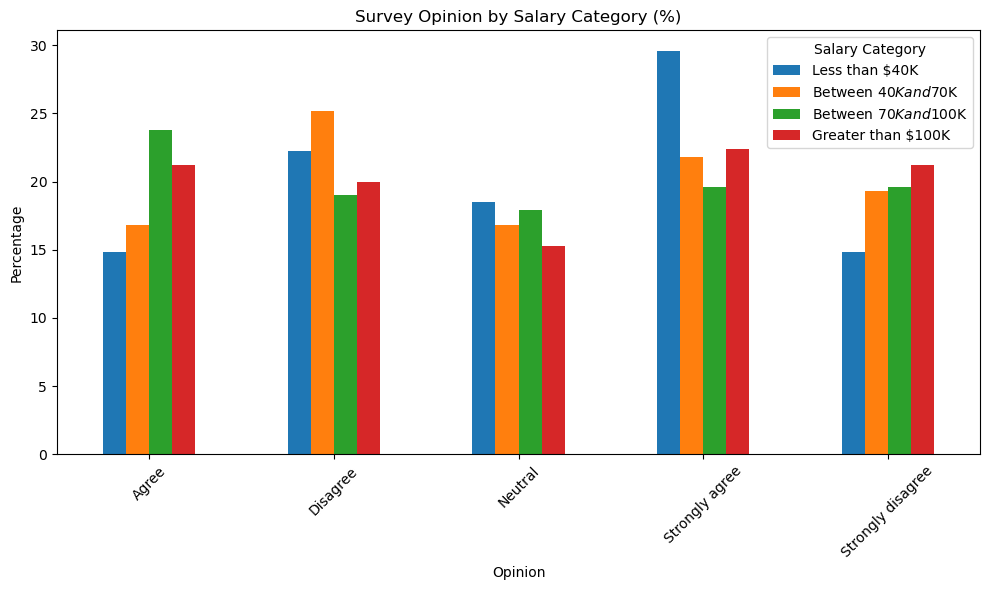

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("P03_02.xlsx")

# Remove $ and convert Salary to numeric
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Recode Salary into categories
bins = [0, 40000, 70000, 100000, float('inf')]
labels = ['Less than $40K', 'Between $40K and $70K', 'Between $70K and $100K', 'Greater than $100K']
df['Salary_Category'] = pd.cut(df['Salary'], bins=bins, labels=labels, right=True)

# Crosstab: Opinion vs Salary category
ct_salary = pd.crosstab(df['Opinion'], df['Salary_Category'])

# Convert counts to percentages by column (salary category)
ct_salary_percent = ct_salary.div(ct_salary.sum(axis=0), axis=1) * 100
ct_salary_percent = ct_salary_percent.round(1)

print("Crosstab (Percentages by Salary Category):")
print(ct_salary_percent)

# Plot column chart
ct_salary_percent.plot(kind='bar', figsize=(10,6))
plt.title('Survey Opinion by Salary Category (%)')
plt.ylabel('Percentage')
plt.xlabel('Opinion')
plt.xticks(rotation=45)
plt.legend(title='Salary Category')
plt.tight_layout()
plt.show()



In [3]:
import pandas as pd
import numpy as np

# Load data
hdd_df = pd.read_excel("P03_20.xlsx", sheet_name="Heating Degree Days")

# Filter for 48 contiguous states (code 5999)
df_48 = hdd_df[hdd_df['Location code'] == 5999].copy()

# Replace -9999 with NaN and drop rows with all NaNs for the months
month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_48[month_cols] = df_48[month_cols].replace(-9999, np.nan)

# Optionally ignore first and last rows if they have missing values
df_48 = df_48.iloc[1:-1]

# Create a season dictionary mapping
season_dict = {
    'Winter': ['Dec', 'Jan', 'Feb'],
    'Spring': ['Mar', 'Apr', 'May'],
    'Summer': ['Jun', 'Jul', 'Aug'],
    'Fall':   ['Sep', 'Oct', 'Nov']
}

# Calculate statistics by season
stats = {}
for season, months in season_dict.items():
    season_values = df_48[months].values.flatten()
    season_values = season_values[~np.isnan(season_values)]  # Remove NaN
    stats[season] = {
        'Mean': round(season_values.mean(), 2),
        'Median': round(np.median(season_values), 2),
        'Std_Dev': round(season_values.std(ddof=1), 2)  # sample std
    }

# Convert to DataFrame for display
stats_df = pd.DataFrame(stats)
print(stats_df)


         Winter  Spring  Summer    Fall
Mean     823.54  373.66   21.33  295.13
Median   816.00  344.00   15.00  267.00
Std_Dev  108.33  194.40   14.61  196.07


In [2]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("P03_30.xlsx", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Compute daily differences
diff_df = df.diff().dropna()

# Correlation matrices
corr_orig = df.corr()
corr_diff = diff_df.corr()

# Count negative correlations in original data (excluding diagonal)
neg_corr_count = (corr_orig.values[np.triu_indices_from(corr_orig, k=1)] < 0).sum()
print("Number of negative correlations (original):", neg_corr_count)

# Identify highest correlation in differences (excluding diagonal)
corr_diff_no_diag = corr_diff.mask(np.eye(len(corr_diff), dtype=bool))
max_corr = corr_diff_no_diag.max().max()
max_pair = corr_diff_no_diag.stack().idxmax()
print("Highest correlation in differences:", max_corr)
print("Currencies with highest correlation:", max_pair)

# Cutoff values for conditional formatting
pos_cutoff = 0.6
neg_cutoff = -0.5

# Export to Excel with conditional formatting
with pd.ExcelWriter("P03_30_correlation.xlsx", engine='xlsxwriter') as writer:
    corr_orig.to_excel(writer, sheet_name='Original Correlation')
    corr_diff.to_excel(writer, sheet_name='Difference Correlation')
    
    workbook  = writer.book
    worksheet_diff = writer.sheets['Difference Correlation']
    
    # Apply conditional formatting for positive correlations
    worksheet_diff.conditional_format(1, 1, len(corr_diff), len(corr_diff), {
        'type': 'cell',
        'criteria': '>=',
        'value': pos_cutoff,
        'format': workbook.add_format({'bg_color': '#C6EFCE', 'font_color': '#006100'})
    })
    
    # Apply conditional formatting for negative correlations
    worksheet_diff.conditional_format(1, 1, len(corr_diff), len(corr_diff), {
        'type': 'cell',
        'criteria': '<=',
        'value': neg_cutoff,
        'format': workbook.add_format({'bg_color': '#FFC7CE', 'font_color': '#9C0006'})
    })
    
    # Optional: you can also format the Original Correlation sheet similarly if desired


Number of negative correlations (original): 0
Highest correlation in differences: 0.780401951723487
Currencies with highest correlation: ('Euro', 'Swedish Krona')


ModuleNotFoundError: No module named 'xlsxwriter'

In [4]:
import pandas as pd

# Load data
df = pd.read_excel("P03_44.xlsx", parse_dates=['Date'])

# # Convert % change to numeric
# df['% change'] = df['% change'].str.rstrip('%').astype(float)

# Extract time components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# a. Group by Month
month_avg = df.groupby('Month')['% change'].mean()
month_min = month_avg.idxmin()
month_max = month_avg.idxmax()
print("Month with Min Avg % change:", month_min)
print("Month with Max Avg % change:", month_max)

# b. Group by Year
year_avg = df.groupby('Year')['% change'].mean()
year_min = year_avg.idxmin()
year_max = year_avg.idxmax()
print("Year with Min Avg % change:", year_min)
print("Year with Max Avg % change:", year_max)

# c. Group by Month and Year
month_year_avg = df.groupby(['Month','Year'])['% change'].mean()
# For September (month 9)
sept_avg = month_year_avg.loc[9]
sept_min_year = sept_avg.idxmin()
sept_max_year = sept_avg.idxmax()
print("Year with Min Avg % change for September:", sept_min_year)
print("Year with Max Avg % change for September:", sept_max_year)

# d. Group by Quarter
quarter_avg = df.groupby('Quarter')['% change'].mean()
quarter_min = quarter_avg.idxmin()
quarter_max = quarter_avg.idxmax()
print("Quarter with Min Avg % change:", quarter_min)
print("Quarter with Max Avg % change:", quarter_max)

# e. Group by Month and Quarter
month_quarter_avg = df.groupby(['Quarter','Month'])['% change'].mean()
# For Quarter 2
q2_avg = month_quarter_avg.loc[2]
q2_min_month = q2_avg.idxmin()
q2_max_month = q2_avg.idxmax()
print("Month with Min Avg % change for Quarter2:", q2_min_month)
print("Month with Max Avg % change for Quarter2:", q2_max_month)

# f. Group by Quarter and Year
quarter_year_avg = df.groupby(['Quarter','Year'])['% change'].mean()
# For Quarter 2
q2_year_avg = quarter_year_avg.loc[2]
q2_min_year = q2_year_avg.idxmin()
q2_max_year = q2_year_avg.idxmax()
print("Year with Min Avg % change for Quarter2:", q2_min_year)
print("Year with Max Avg % change for Quarter2:", q2_max_year)

# g. Group by Month, Quarter, and Year
month_quarter_year_avg = df.groupby(['Year','Quarter','Month'])['% change'].mean()
# For Quarter 4 of 2014
q4_2014 = month_quarter_year_avg.loc[2014,4]
q4_min_month = q4_2014.idxmin()
q4_max_month = q4_2014.idxmax()
print("Month with Min Avg % change for Quarter4 of 2014:", q4_min_month)
print("Month with Max Avg % change for Quarter4 of 2014:", q4_max_month)


Month with Min Avg % change: 8
Month with Max Avg % change: 10
Year with Min Avg % change: 2015
Year with Max Avg % change: 2013
Year with Min Avg % change for September: 2015
Year with Max Avg % change for September: 2013
Quarter with Min Avg % change: 3
Quarter with Max Avg % change: 4
Month with Min Avg % change for Quarter2: 6
Month with Max Avg % change for Quarter2: 5
Year with Min Avg % change for Quarter2: 2015
Year with Max Avg % change for Quarter2: 2018
Month with Min Avg % change for Quarter4 of 2014: 12
Month with Max Avg % change for Quarter4 of 2014: 11


In [6]:
import pandas as pd

# Load data
df = pd.read_excel("P03_64.xlsx", parse_dates=['Month'])

# Calculate monthly differences for each index
df['Diff_DJIA'] = df['DJIA'].diff()
df['Diff_DJTA'] = df['DJTA'].diff()
df['Diff_DJUA'] = df['DJUA'].diff()

# a. Correlation table of differences
diff_cols = ['Diff_DJIA', 'Diff_DJTA', 'Diff_DJUA']
corr_diff = df[diff_cols].corr().round(3)
print("Correlation table of differences:\n", corr_diff)

# b. Create lags (1 to 4 months) for each difference variable
lags = [1,2,3,4]
for col in diff_cols:
    for lag in lags:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Example: Dec-50 lag 3 of DJIA difference
# Find the row corresponding to Dec 1950
dec_50_lag3 = df.loc[df['Month'] == '1950-12-01', 'Diff_DJIA_lag3'].values[0]
print("Dec-50 lag 3 of DJIA difference:", round(dec_50_lag3,2))

# c. Correlation table of differences and lags
lag_cols = [f'{col}_lag{lag}' for col in diff_cols for lag in lags]
all_corr_cols = diff_cols + lag_cols
corr_all = df[all_corr_cols].corr().round(3)
print("Correlation table including lags:\n", corr_all)

# Optional: identify correlations above 0.5
high_corr = corr_all[(corr_all > 0.5) & (corr_all != 1.0)].stack().sort_values(ascending=False)
print("High correlations (>0.5):\n", high_corr)


Correlation table of differences:
            Diff_DJIA  Diff_DJTA  Diff_DJUA
Diff_DJIA      1.000      0.734      0.304
Diff_DJTA      0.734      1.000      0.172
Diff_DJUA      0.304      0.172      1.000
Dec-50 lag 3 of DJIA difference: 9.49
Correlation table including lags:
                 Diff_DJIA  Diff_DJTA  Diff_DJUA  Diff_DJIA_lag1  \
Diff_DJIA           1.000      0.734      0.304           0.041   
Diff_DJTA           0.734      1.000      0.172           0.028   
Diff_DJUA           0.304      0.172      1.000           0.057   
Diff_DJIA_lag1      0.041      0.028      0.057           1.000   
Diff_DJIA_lag2     -0.058     -0.067      0.012           0.024   
Diff_DJIA_lag3      0.039      0.015      0.035          -0.037   
Diff_DJIA_lag4      0.070      0.115      0.044           0.046   
Diff_DJTA_lag1      0.102      0.057      0.070           0.740   
Diff_DJTA_lag2     -0.042     -0.066      0.035           0.086   
Diff_DJTA_lag3      0.061      0.060      0.049   